In [1512]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [1513]:
data = pd.read_csv(os.path.join("data", "train.csv"))

In [1514]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1515]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1516]:
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [1517]:
data["FamilySize"] = data["Parch"] + data["SibSp"]

In [1518]:
data.drop(columns=["SibSp", "Parch"], inplace=True)

In [1519]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [1520]:
X_data = data.drop(columns=["Survived"])
y_data = data["Survived"]

In [1521]:
X_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [1522]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Age         714 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    889 non-null    object 
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [1523]:
X_data.isnull().sum()

Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [1524]:
X_data["Age"] = X_data["Age"].fillna(X_data["Age"].median())
X_data["Embarked"] = X_data["Embarked"].ffill()

In [1525]:
X_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

In [1526]:
X_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1527]:
X_data["Embarked"] = X_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
X_data["Sex"] = X_data["Sex"].map({"male": 0, "female": 1})

In [1528]:
X_data.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0


In [1529]:
dataset = tf.data.Dataset.from_tensor_slices((X_data.values, y_data.values))

In [1530]:
batch_size = 64
dataset = dataset.shuffle(buffer_size=len(X_data)).batch(batch_size)

In [1531]:
len(dataset)

14

In [1532]:
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset)) + 1
test_size = int(0.2 * len(dataset)) + 1
train_size, val_size, test_size

(9, 2, 3)

In [1533]:
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size).take(val_size)
test_data = dataset.skip(train_size + val_size).take(test_size)

len(train_data), len(test_data)

(9, 3)

Creating a model

In [1534]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [1535]:
model = Sequential()

In [1536]:
model.add(Dense(64, activation="relu", input_shape=(6,)))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(1, activation="sigmoid"))

/home/varshaan/titanic-dataset/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1537]:
from tensorflow.keras.optimizers import Adam

In [1538]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [1539]:
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_213 (Dense)               │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 3,809 (14.88 KB)

 Non-trainable params: 192 (768.00 B)

In [1540]:
history = model.fit(train_data, epochs=50, validation_data=val_data)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5925 - loss: 0.7996 - val_accuracy: 0.4375 - val_loss: 0.7273
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6610 - loss: 0.6799 - val_accuracy: 0.4297 - val_loss: 0.7076
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 0.6219 - val_accuracy: 0.5625 - val_loss: 0.6892
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 0.5925 - val_accuracy: 0.6250 - val_loss: 0.6541
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7060 - loss: 0.5691 - val_accuracy: 0.7266 - val_loss: 0.6481
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7216 - loss: 0.5472 - val_accuracy: 0.7031 - val_loss: 0.6345
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7366 - loss: 0.5546 - val_accuracy: 0.6797 - val_loss: 0.6410
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7537 - loss: 0.5233 - val_accuracy: 0.7266 - val_loss: 0.6123
Epoch 9

In [1541]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

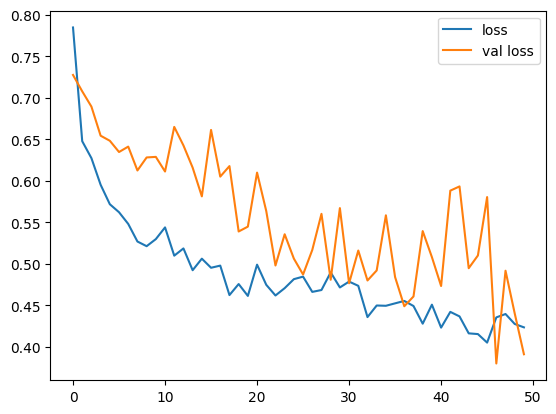

In [1542]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()

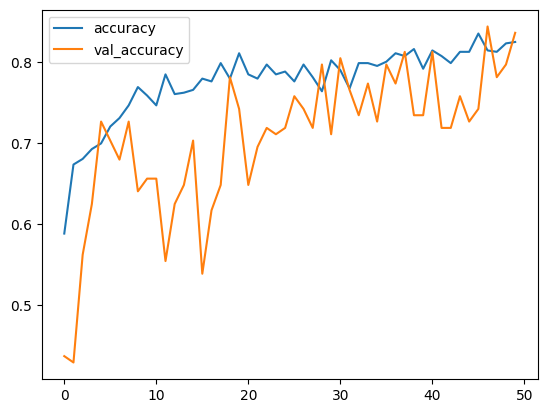

In [1543]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [1544]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [1545]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [1546]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    acc.update_state(y, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


2025-07-22 06:56:50.220293: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [1547]:
print(precision.result(), recall.result(), acc.result())

tf.Tensor(0.8596491, shape=(), dtype=float32) tf.Tensor(0.6282051, shape=(), dtype=float32) tf.Tensor(0.80213904, shape=(), dtype=float32)


In [1548]:
test_dataset = pd.read_csv(os.path.join("data", "test.csv"))

In [1549]:
test_dataset.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [1550]:
test_dataset.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [1551]:
test_dataset["Age"] = X_data["Age"].fillna(X_data["Age"].median())
test_dataset["Fare"] = X_data["Fare"].fillna(X_data["Fare"].median())

In [1552]:
test_dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1553]:
test_dataset["FamilySize"] = test_dataset["Parch"] + test_dataset["SibSp"]
test_dataset.drop(columns=["SibSp", "Parch"], inplace=True)

In [1554]:
test_dataset.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,Q,0
1,3,female,38.0,71.2833,S,1
2,2,male,26.0,7.9250,Q,0
3,3,male,35.0,53.1000,S,0
4,3,female,35.0,8.0500,S,2


In [1555]:
test_dataset["Embarked"] = test_dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2})
test_dataset["Sex"] = test_dataset["Sex"].map({"male": 0, "female": 1})

In [1556]:
test_dataset.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,22.0,7.2500,2,0
1,3,1,38.0,71.2833,0,1
2,2,0,26.0,7.9250,2,0
3,3,0,35.0,53.1000,0,0
4,3,1,35.0,8.0500,0,2


In [1557]:
predictions = model.predict(test_dataset)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [1559]:
predictions_binary = (predictions > 0.5).astype(int)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [1561]:
test_dataset_copy = pd.read_csv(os.path.join("data", "test.csv"))

In [1562]:
test_dataset_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1563]:
submission = pd.DataFrame({
    'PassengerId': test_dataset_copy['PassengerId'],
    'Survived': predictions_binary.flatten()
})

In [1565]:
submission.to_csv(os.path.join("data", "submission.csv"), index = False)